# Import packages

In [203]:
%load_ext autoreload
%autoreload 2
    
import file_handler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re

import matplotlib.cm as cm
import matplotlib as mpl

import osmnx as ox
import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## basic Loading and table drawing functions

In [193]:
def getRoadChart_by_time(start_year,end_year,road_name,city):
    roads = []
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road_name)
                if item != None:
                    roads.append(item)
            except:
                print(f"Error: {e}")
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    return df
    
def getRoadChart(road):
    city = 'اصفهان'

    roads = []

    for year in range(1395, 1403):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road)
                if item != None:
                    roads.append(item)
            except:
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    return df

def Draw_road_time_series(df2):
    plt.figure()  # Create a new figure for each plot
    df2['زمان شروع'] = df2['زمان شروع'].apply(lambda x: x.split()[0]) # drop the 00:00:00 part
    plt.plot(df2['زمان شروع'], df2['تعداد کل وسیله نقلیه'])
    x=df2['زمان شروع']
    # Customize x-axis ticks and labels
    # Rotate x-axis labels for better readability
    plt.xticks(x[::365],  rotation=45)
    # Add more customization as needed
    plt.title(file_handler.persian_fix(df2['نام محور'][0]))
    # Add title, labels, legend, etc.
    plt.xlabel(file_handler.persian_fix('تاریخ'))
    plt.ylabel(file_handler.persian_fix('تعداد خودرو '))
    plt.legend(['Legend'])

def Draw_road_time_series_smooth(df2):
    plt.figure()  # Create a new figure for each plot
    df2['زمان شروع'] = df2['زمان شروع'].apply(lambda x: x.split()[0]) # drop the 00:00:00 part
    ave = df2['تعداد کل وسیله نقلیه'].rolling(window=7).mean()
    plt.plot(df2['زمان شروع'], ave)
    x=df2['زمان شروع']
    # Customize x-axis ticks and labels
    # Rotate x-axis labels for better readability
    plt.xticks(x[::365],  rotation=45)
    # Add more customization as needed
    plt.title(file_handler.persian_fix(df2['نام محور'][0]))
    # Add title, labels, legend, etc.
    plt.xlabel(file_handler.persian_fix('تاریخ'))
    plt.ylabel(file_handler.persian_fix('تعداد خودرو '))
    plt.legend(['Legend'])

## test the function on some data:

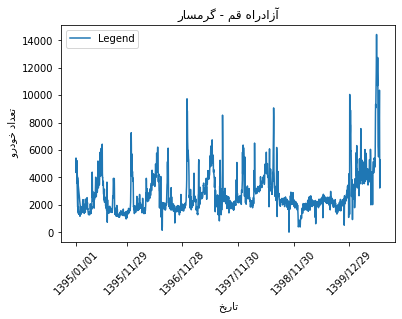

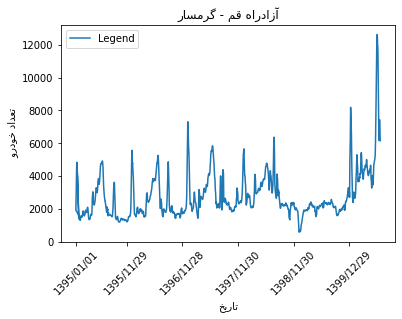

In [4]:

df2 = getRoadChart('113201')
df3 = getRoadChart_by_time(1395,1398,'113201','تهران')
Draw_road_time_series(df2)
Draw_road_time_series_smooth(df2)

# Load the road_code of each city :
load the road_code and road_name of each city and copple them

In [191]:
def Load_road_code_of_city(city):
    codes = list(map ( lambda x: re.search('([0-9]{6,6})', x).group(),file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(city))))
    return codes

def Load_road_name_of_city(city):
    t = file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(city))
    names = {}
    for i in range(len(t)):
        names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])
    return names

def Load_roads_code_of_contry():
    codes = []
    for item in file_handler.Citys:
        codes.extend(Load_road_code_of_city(item))
    return codes

def Load_roads_name_of_contry():
    t = []
    for item in file_handler.Citys:
        t.extend(file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(item)))
        
    names = {}
    for i in range(len(t)):
        names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])
    return names
    
codes = Load_road_code_of_city('اصفهان')
names =Load_road_name_of_city('اصفهان')
codes
# codes = Load_roads_code_of_contry()
# names = Load_roads_name_of_contry()
# len(all_roads_name)

['214204',
 '214607',
 '214901',
 '215301',
 '213904',
 '215102',
 '215201',
 '215153',
 '215302',
 '214211',
 '214751',
 '214553',
 '214953',
 '214701',
 '213451',
 '214654',
 '214652',
 '214552',
 '213903',
 '215158',
 '214502',
 '214259',
 '214702',
 '214752',
 '213501',
 '214603',
 '213402',
 '213202',
 '214256',
 '214551',
 '214402',
 '214401',
 '213953',
 '213114',
 '214503',
 '213113',
 '214301',
 '213155',
 '214501',
 '213104',
 '213602',
 '214260',
 '214951',
 '214261',
 '214952',
 '213154',
 '214351',
 '215101',
 '213651',
 '213101',
 '213452',
 '214255',
 '214753',
 '213163',
 '215251',
 '215151',
 '215154',
 '213102',
 '214451',
 '213152',
 '213954',
 '213151',
 '213902',
 '213601',
 '214903',
 '213401',
 '214210',
 '214657',
 '213156',
 '214653',
 '213164',
 '214254',
 '213901',
 '214604',
 '213952',
 '214703',
 '214452',
 '214902',
 '214851',
 '213105',
 '215103',
 '215104',
 '213103',
 '213153',
 '213652',
 '213106',
 '213551',
 '214252',
 '214801',
 '213252',
 '214205',

## Make dictionary roads_codes & roads_names :

In [194]:
def Make_dict(roads_codes):
    roads = dict()
    for code in roads_codes:
        roads[code] = getRoadChart(str(code))
    return roads

test_roads = Make_dict(codes)

# Cleaning Data:

In [145]:
# Working with an example df
df = test_roads['113201']

# TODO smooth worked time


# df.loc[df['مدت زمان کارکرد(دقیقه)'] < 1440]
df.drop(columns='index', inplace=True)

df

,کد محور,نام محور,زمان شروع,زمان پایان,مدت زمان کارکرد(دقیقه),تعداد کل وسیله نقلیه,تعداد وسیله نقلیه کلاس 1,تعداد وسیله نقلیه کلاس 2,تعداد وسیله نقلیه کلاس 3,تعداد وسیله نقلیه کلاس 4,تعداد وسیله نقلیه کلاس 5,سرعت متوسط,تعداد تخلف سرعت غیرمجاز,تعداد تخلف فاصله غیرمجاز,تعداد تخلف سبقت غیرمجاز,تعداد برآورد شده,مدت زمان کارکرد (دقیقه),تعداد تخلف سرعت غیر مجاز,تعداد تخلف فاصله غیر مجاز,تعداد تخلف سبقت غیر مجاز
0,113201,آزادراه قم - گرمسار,1395/01/01 00:00:00,1395/01/02 00:00:00,1440.0,5257,5138,36,30,32,21,100.42,188.0,679.0,0.0,NaN,NaN,NaN,NaN,NaN
1,113201,آزادراه قم - گرمسار,1395/01/02 00:00:00,1395/01/03 00:00:00,1440.0,5397,5255,37,23,55,27,101.69,237.0,631.0,0.0,NaN,NaN,NaN,NaN,NaN
2,113201,آزادراه قم - گرمسار,1395/01/03 00:00:00,1395/01/04 00:00:00,1440.0,4778,4572,40,24,86,56,100.63,180.0,403.0,0.0,NaN,NaN,NaN,NaN,NaN
3,113201,آزادراه قم - گرمسار,1395/01/04 00:00:00,1395/01/05 00:00:00,1440.0,4525,4379,29,28,50,39,102.95,271.0,439.0,0.0,NaN,NaN,NaN,NaN,NaN
4,113201,آزادراه قم - گرمسار,1395/01/05 00:00:00,1395/01/06 00:00:00,1440.0,4340,4188,21,26,48,57,102.67,236.0,385.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,113201,آزادراه قم - گرمسار (چرمشهر),1401/07/13 00:00:00,1401/07/13 18:35:00,NaN,5975,4502,343,194,311,625,98.00,NaN,NaN,NaN,6378.0,1070.0,766.0,1026.0,0.0
2024,113201,آزادراه قم - گرمسار (چرمشهر),1401/07/27 13:15:00,1401/07/28 00:00:00,NaN,3232,1718,406,240,265,603,88.00,NaN,NaN,NaN,8580.0,645.0,27.0,129.0,0.0
2025,113201,آزادراه قم - گرمسار (چرمشهر),1401/07/28 00:00:00,1401/07/29 00:00:00,NaN,5300,3003,607,264,488,938,88.00,NaN,NaN,NaN,9348.0,1440.0,83.0,199.0,0.0
2026,113201,آزادراه قم - گرمسار (چرمشهر),1401/07/29 00:00:00,1401/07/30 00:00:00,NaN,4543,2600,432,251,429,831,89.00,NaN,NaN,NaN,9378.0,1340.0,51.0,157.0,0.0


# find intersting road :
load and then sort the road by the linearRegression results.

In [192]:
def get_LinearReg_of_road_codes(codes):
    regression = dict()
    for i in  range(len(codes)):
        model = LinearRegression()
        df = getRoadChart(codes[i])
    
        y = df['تعداد کل وسیله نقلیه']
        x = np.reshape(df.index, (-1,1))
        model.fit(x, y)
        regression[codes[i]] = model
    return regression

roads_reg = get_LinearReg_of_road_codes(codes)


IndexError: list index out of range

In [125]:
for (code,name ) in enumerate(names):
    print(names[name] + " : " + str(roads_reg[name].coef_))


‫آزادراه گرمسار - قم‬ : [0.55634035]
‫گيلاوند - دماوند‬ : [5.08231628]
‫چرمشهر - حسن‌آباد ‬ : [0.84467905]
‫ساوه - تهران (ابتداي آزادراه)‬ : [-8.26069133]
‫گدوک - فيروزکوه‬ : [0.48240716]
‫تهران - پرديس (ابتداي آزادراه)‬ : [2.43406041]
‫آبعلي - پلور‬ : [0.18442214]
‫دماوند - فيروزکوه‬ : [-0.07477136]
‫شهريار (دپو) - تهران‬ : [2.08228513]
‫همت - وردآورد‬ : [-13.87390282]
‫فيروزکوه - گدوک‬ : [1.18136118]
‫آبسرد - سربندان ‬ : [1.57630354]
‫آبسرد - ايوانکي‬ : [0.21879446]
‫تهران - امام زاده داوود‬ : [-0.10218702]
‫ميگون - شمشک‬ : [-0.69553011]
‫فشم - تهران‬ : [0.57887245]
‫ري - قرچک ‬ : [-2.41885222]
‫رودهن - دماوند‬ : [2.28971099]
‫تهران - لواسان (طلاييه)‬ : [-1.26753436]
‫ايوانکي - آبسرد‬ : [0.19656819]
‫شمشک - ديزين‬ : [-1.17129504]
‫شمشک - ميگون‬ : [0.05179719]
‫لواسان - تهران (طلاييه)‬ : [-3.73438389]
‫وردآورد - همت‬ : [-1.95658008]
‫امين آباد - سربندان ‬ : [0.25717809]
‫آزادراه کرج - آزادگان (عوارضي)‬ : [8.21497365]
‫فيروزکوه - سه راهي ارجمند‬ : [0.25404689]
‫تهران - قم (آزادراه)‬ : 

In [127]:
def sort_reg_form_High_to_low(regression):
    regression = {k: v for k, v in regression.items() if v != {}}
    sorted_models = sorted(regression.items(), key=lambda x: x[1].coef_[0])
    return sorted_models , regression

sorted_models , regression = sort_reg_form_High_to_low(roads_reg)
for (name, coef) in sorted_models:
    print(names[name], regression[name].coef_)

‫همت - وردآورد‬ [-13.87390282]
‫آزادراه کرج - تهران (عوارضي قديم)‬ [-11.58387791]
‫ساوه - تهران (ابتداي آزادراه)‬ [-8.26069133]
‫تهران - پاکدشت‬ [-5.61558305]
‫جاجرود - تهران‬ [-4.35688914]
‫قم - تهران (آزادراه)‬ [-4.09998695]
‫عوارضي تهران - قم‬ [-4.01451923]
‫لواسان - تهران (طلاييه)‬ [-3.73438389]
‫تهران - ساوه (ابتداي آزادراه)‬ [-3.63763644]
‫تهران - قم (آزادراه)‬ [-3.49486734]
‫شهريار - تهران (چيتگر - باغستان)‬ [-2.93230786]
‫ري - قرچک ‬ [-2.41885222]
‫وردآورد - همت‬ [-1.95658008]
‫پاکدشت - تهران‬ [-1.56358674]
‫آزادراه تهران - کرج (عوارضي قديم)‬ [-1.46425856]
‫اسلامشهر - واوان‬ [-1.30850804]
‫تهران - لواسان (طلاييه)‬ [-1.26753436]
‫امامزاده هاشم - سه راهي مشاء‬ [-1.25461912]
‫ديزين - شمشک‬ [-1.24295362]
‫واوان - اسلامشهر‬ [-1.24244028]
‫شمشک - ديزين‬ [-1.17129504]
‫حسن آباد - تهران (جاده قديم قم)‬ [-0.92867596]
‫ميگون - شمشک‬ [-0.69553011]
‫سربندان - امين آباد ‬ [-0.56948561]
‫سه راهي مشاء - امامزاده هاشم‬ [-0.54193323]
‫سه راهي ارجمند - فيروزکوه‬ [-0.31840874]
‫ميگون - فشم‬ [-0.2

## check the extrime change in top roads
we sorted the road form most groth to least (negative) grouth , we only care about the extrem ones.

total road number
83


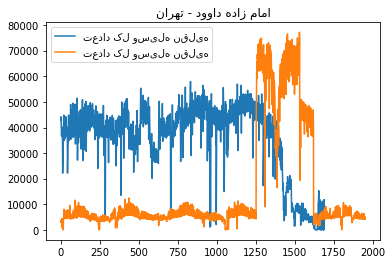

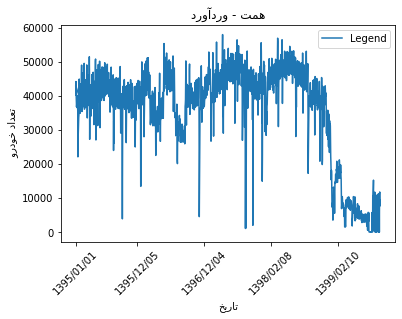

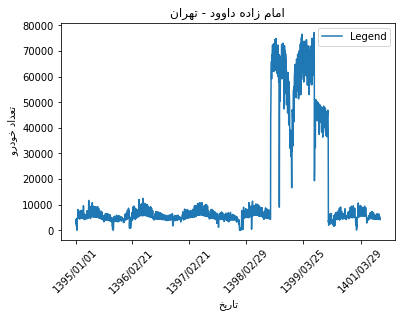

In [129]:
# Now lets plot some of these.
import file_handler
import importlib
importlib.reload(file_handler)

print("total road number")
print(len(sorted_models))

road_min = sorted_models[0]
road_max = sorted_models[-1]
df1=roads[road_min[0]]
df2=roads[road_max[0]]
ax = df1.iloc[:, [6]].plot(title=file_handler.persian_fix(names[road_min[0]]))
df2.iloc[:, [6]].plot(ax = ax, title=file_handler.persian_fix(names[road_max[0]]))


Draw_road_time_series(df1)
Draw_road_time_series(df2)

# show data on map :

## example for how to work with map :

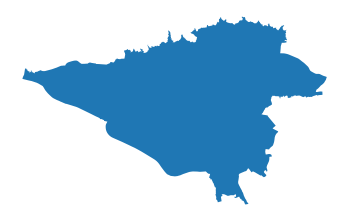

In [26]:
import osmnx as ox
city = ox.places = ox.geocode_to_gdf(['Tehran'])

ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

/tmp/ipykernel_45027/4214847888.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')


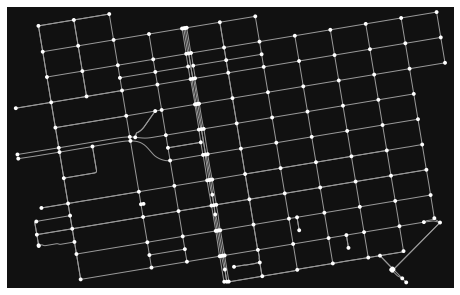

(<Figure size 576x576 with 1 Axes>, <Axes: >)

In [27]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

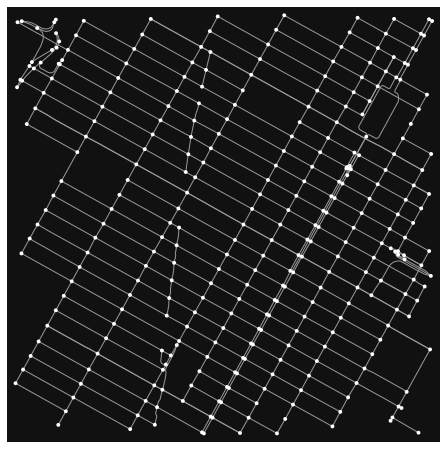

(<Figure size 576x576 with 1 Axes>, <Axes: >)

In [28]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

/tmp/ipykernel_45027/449147392.py:4: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.get_undirected(G)


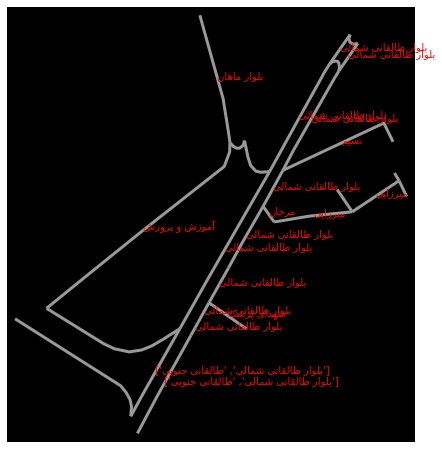

In [29]:
# G = ox.graph_from_place('کرج - آزادگان', network_type='drive', simplify=True)
# ox.plot_graph(G)
G = ox.graph_from_address('کرج', dist=200, network_type='drive')
G = ox.get_undirected(G)

fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
                        show=False, close=False)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    ax.title.set_color('red')

    ax.annotate(file_handler.persian_fix(text), (c.x, c.y), c='red')
plt.show()

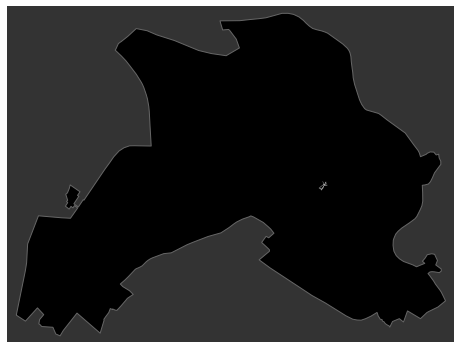

In [30]:
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)
gdf = ox.geocode_to_gdf("کرج")

# to this matplotlib axis, add the place shape(s)
gdf.plot(ax=ax, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

## map of our data

In [56]:
def load_the_map_of_city(place,custom_filter,bbox):
    G = ox.graph_from_bbox(bbox=(36.1290,35.1525,52.4501,50.2940), retain_all=True, simplify = True, network_type='all', custom_filter=cf)
    # Prepare data
    u = []
    v = []
    key = []
    data = []
    for uu, vv, kkey, ddata in G.edges(keys=True, data=True): # added ww
        u.append(uu)
        v.append(vv)
        key.append(kkey)
        data.append(ddata)
    return data

def find_road_in_map_by_code(data,code):
    for item in data:
        if item.get('osmid') == code:
            print(item)

In [58]:
place = ["Tehran, Iran"]
cf = '["highway"~"trunk|motorway|primary"]'
bbox=(36.1290,35.1525,52.4501,50.2940)

data = load_the_map_of_city(place,cf,bbox)
find_road_in_map_by_code(data,4480201)

{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 19.377}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 539.103, 'geometry': <LINESTRING (51.367 35.561, 51.368 35.564, 51.369 35.564, 51.369 35.566)>}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 17.774}


### code of importent road

In [186]:
osmid_codes = {
    449543314: 114552,
    4480201:113203,
    455662779:113201,
    310645428:113203,
    682250684:113204,
    690717083:113205,
    179112188:113206,
    179112339:113207,
    39084751:113209,
    474570267:113210,
    732964465:113211,
    1164700378:113212,
    36866563:113213,
    614530723:113214,
    197825489:113228,
    455662482:113251,
    285327032:113253,
    381904561:113254,
    4434033:113255,
    575076025:113256,
    480643667:113257,
    39084751:113259,
    474606388:113260,
    709553124:113261,
    488449902:113262,
    36866563:113263,
    368438120:113264,
    35703240:113278,
    28759193:113302,
    789349374:113352,
    737634684:113401,
    4906731:113403,
    4906887:113404,
    # 425354039:
    667922913:113413,
    184492590:113414,
    1148442659:113415,
    510202216:113416,
    1046123165:113417,
    1037876565:113418,
    739570288:113419,
    663254975:113474,
    408320454:113501,
    222990063:113552,
    39017520:113801,
    368453187:113802,
    84344124:113853,
    410366481:113804,
    609759412:113904,
    251846902:113903,
    755383671:114101,
    663501002:114102,
    465671667:114301,
    666120704:114352,
    514896361:114401,
    406648524:114451,
    1163351152:114551,
    # 466291376:
}

osmid_names = {
    'بزرگراه آزادگان': 114552,
    'آزادراه خلیج فارس':113203,
    113201:'آزاد راه قم ـ گرمسار',
    113205:'تهران-قم (خلیج فارس)',
    113204:'تهران - ساوه (ابتداي آزادراه)‬',
    113205:'تهران - جاجرود‬',
    113206:'تهران-پردیس(ابتدا)',
    113207:'تهران-پردیس(انتها)',
    113209:'تهران - پاکدشت',
    113210:'عوارضی تهران-قم',
    113211:'چرمشهر-حسن آباد',
    113212:'امامزاده داوود-تهران',
    113213:'تهران-لواسان(طلاییه)',
    113214:'تهران-لواسان(سوهانک)',
    113228:'تهران-ساوه(پرند)',
    113251:'گرمسار-قم',
    113253:'قم-تهران',
    113254:'ساوه-تهران(ابتدا)',
    113255:'جاجرود-تهران',
    113256:'پردیس-تهران(ابتدا)',
    113257:'پردیس-تهران(انتها)',
    113259:'پاکدشت-تهران',
    113260:'قم-تهران عوارضی',
    113261:'حسن آباد-چرمشهر',
    113262:'تهران - امام زاده داوود‬',
    113263:'لواسان-تهران(طلاییه)',
    113264:'لواسان-تهران(سوهانک)‬',
    113278:'‫آزادراه ساوه - تهران(پرند)‬',
    113302:'اسلامشهر-واوان',
    113352:'‫واوان-اسلامشهر‬',
    113401:'آبسرد-ایوانکی',
    113403:'رودهن-دماوند',
    113404:'دماوند-فیروزکوه',
    113413:'سه راهي مشاء - امامزاده هاشم‬',
    113414:'کمربندي جنوبي رودهن (انتهاي پرديس - دماوند)‬',
    113415:'فیروزکوه-سمنان',
    113416:'آبسرد-گیلاوند',
    113417:'آبسرد-سربندان',
    113418:'سربندان-امین آباد',
    113419:'دماوند-گیلاوند',
    113474:'آبعلی-رودهن',
    113501:'فیروزکوه-گدوک',
    113552:'فیروزکوه-سه راهی ارجمند',
    113801:'تهران-فشم',
    113802:'فشم-میگون',
    113853:'میگون-شمشک',
    113804:'شمشک-دیزین',
    113904:'تهران - شهريار (دپو)‬',
    113903:'تهران - شهريار (چيتگر - باغستان)‬',
    114101:'تهران - حسن آباد (جاده قديم قم)‬',
    114102:'رباط کریم-ساوه',
    114301:'کمربندی دوم تهران(ورامین-شورآباد)',
    114352:'قرچک-ری',
    114401:'پاکدشت-شریف آباد',
    114451:'شريف آباد - پاکدشت‬ ',
    114551:'آزادراه کرج - تهران (عوارضي قديم)‬',
}
# check if osmid_codes type is dict
# type(osmid_codes) == dict
# len(set([1,3,4,444,4]).intersection(set([1,3])))
# item = [4480201]
# len(set(item).intersection(set(osmid_codes.keys()))) > 0

In [187]:
def map_drawer(data):
    roadCols = []
    edge_width = []
    # cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["red","orange", "green"])
    cmap =  mpl.colormaps['turbo'].resampled(8)
    for item in data:
        mark = False
    
        if "osmid" in item.keys():
            # Check by code
            if type(item['osmid']) == list:
                if len( set(item['osmid']).intersection(set(osmid_codes.keys()))) >0: #if a road has multiple osmid's see if any of them intersects.
                    edge = 5
                    mark = True
                    code = list(set(item['osmid']).intersection(set(osmid_codes.keys())))[0]
            else:
                if item["osmid"] in list(osmid_codes.keys()):
                    edge = 5
                    code = item['osmid']
                    mark = True
        if mark:
            # get 6digit code
            _6d = str(osmid_codes[code])
            val = (regression[_6d].coef_)
            min = -12
            max = +12
    
    
            #normalize color
            val =( val - min )/(max -min)
            color = (mpl.colors.rgb2hex(cmap(val), keep_alpha=False))
    
            # check by names
        if ('name' in item.keys()):
            if type(item['name']) == str:
                if item["name"] in osmid_names.keys():
                    color = "#FFFFF0"
                    edge = 5
                    # els
    
                    mark = True
                    _6d = str(osmid_names[item['name']])
                    val = (regression[_6d].coef_)
                    min = -12
                    max = +12
    
    
                    #normalize color
                    val =( val - min )/(max -min)
                    color = (mpl.colors.rgb2hex(cmap(val), keep_alpha=False))
    
    
        if not mark:
            color = "#00FFFF"
            edge = 0.4
    
        roadCols.append(color)
        edge_width.append(edge)
    
    # Plot
    bgcolor = "#1e1e1e"
    fig, ax = ox.plot_graph(G, node_size=0,
                            dpi=500, bgcolor=bgcolor,
                            save=False, edge_color=roadCols,
                            edge_linewidth=edge_width, edge_alpha=1, figsize=(12, 12))
    
    # fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
    #                         show=False, close=False)
    labels = []
    for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
        if (edge['osmid'] == 449543314) or (4480201 == edge['osmid']):
            c = edge['geometry'].centroid
            text = edge['name']
    
            ax.title.set_size(14)
            if edge['name'] in labels:
                continue;
    
            labels.append(edge['name'])
            e1 = edge
    
            ax.annotate(file_handler.persian_fix(text),
                        (c.x, c.y), c='yellow', size=4)
    
    # fig.show()
    
    fig.tight_layout(pad=0)
    fig.savefig("heatmap.jpg", dpi=600, bbox_inches='tight', format="png",
                facecolor=fig.get_facecolor(), transparent=False)
    fig


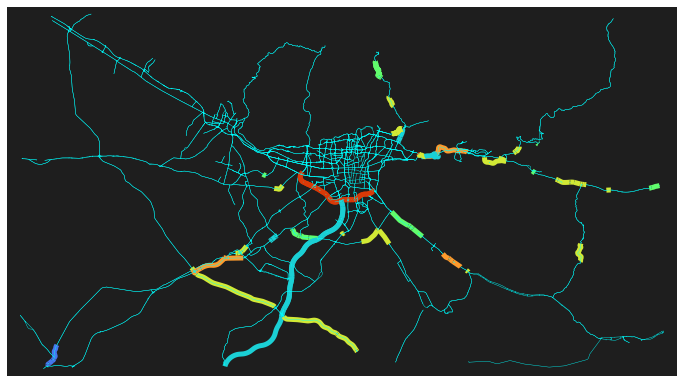

In [188]:
map_drawer(data)

In [74]:
data_df.loc[ data_df['osmid'] == 449543314]

NameError: name 'data_df' is not defined